In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

In [3]:
tf.test.is_built_with_cuda()

True

In [4]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.cifar10.load_data()


170498071/170498071 [==============================] - 2s 0us/step


In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
def plot_images(index):
    plt.figure(figsize=(8,1))
    plt.imshow(X_train[index])

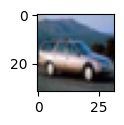

In [7]:
plot_images(4)

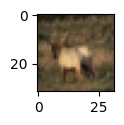

In [8]:
plot_images(3)

In [9]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [10]:
classes[y_train[3][0]]

'deer'

In [11]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [12]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [13]:
X_train_scaled

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [14]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [15]:
y_train_categorical=tf.keras.utils.to_categorical(
                        y_train,num_classes=10,dtype="float32")
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [16]:
y_test_categorical=tf.keras.utils.to_categorical(
                    y_test,num_classes=10,dtype="float32")
y_test_categorical[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [17]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(4000,activation="relu"),
    keras.layers.Dense(2500,activation="relu"),
    keras.layers.Dense(1000,activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")])

model.compile(optimizer="SGD",
              loss="categorical_crossentropy",
              metrics="accuracy"
             )
model.fit(X_train_scaled,y_train_categorical,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 15s 6ms/step - loss: 1.8024 - accuracy: 0.3566
Epoch 2/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6076 - accuracy: 0.4302
Epoch 3/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5233 - accuracy: 0.4608
Epoch 4/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4581 - accuracy: 0.4853
Epoch 5/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4010 - accuracy: 0.5040
Epoch 6/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3579 - accuracy: 0.5202
Epoch 7/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3121 - accuracy: 0.5373
Epoch 8/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2714 - accuracy: 0.5523
Epoch 9/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2351 - accuracy: 0.5646
Epoch 10/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.19

In [18]:
classes[np.argmax(model.predict(X_test_scaled)[0])]

313/313 [==============================] - 1s 2ms/step


'cat'

In [19]:
classes[y_test[0][0]]

'cat'